## Credit Card Fraud Detection

### Project Overview
* Developement of a classification model for detecting credit card fraud transactions.
* Data analysis and balance.
* Optimized Logistic Regression, SVM, Random Forest and XGBoost Classification models to reach the best performance.
* Analyzed models errors and feature importances.


### Code and Resources Used 
**Python Version:** 3.7  
**Packages:** pandas, numpy, sklearn, matplotlib, seaborn, imblearn.

### Dataset
The dataset contains information about credit card transactions made in a two days lapse by Europeans cardholders. It has been developed by Worldline and the Machine Learning Group  of ULB (Université Libre de Bruxelles) (http://mlg.ulb.ac.be).  
It is highly unbalanced, consisting of 284,807 transactions/instances, with only 0.17% of positive (fraud) class, and 31 features from which 28 are numerical variables result of a PCA transformation.   
Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud 

### EDA
* Features distribution and correlation analysis
* Non-anonymous features grouped analysis

### Models Building and Performance

We tested several classification algorithms and 4 tuned models were developed, been the Random Forest Classifier the one with the best performance:

*	**Logistic Regression**: precision=0.21, recall=0.88, f1-score=0.34. 
*	**SVM**: precision=0.07, recall=0.92, f1-score=0.13.
*	**Random Forest**: precision=0.81, recall=0.87 , f1-score=0.84.
*	**XGBoost**: precision=0.31, recall=0.89, f1-score=0.46.

### Metrics Chosen 
**Precision, Recall, F1-score.** 

We chose to use the 3 metrics from the classification report and print the confusion matrix for a clear interpretacion of the results given the unbalance nature of the data. 


### Notebook content

1. Exploratory Data Analysis
2. Data Preparation
3. Models Training, evaluation and error analysis
4. Model selection

## 1. Exploratory Data Analysis
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
warnings.simplefilter('ignore')

In [3]:
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('dataset/creditcard.csv')

In [5]:
ds = df.copy()

In [6]:
ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
ds.shape

(284807, 31)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
ds.isnull().sum().sum()

0

In [61]:
ds.duplicated().sum()

1081

In [84]:
ds['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is unbalanced with respect to which will be our target 'Class'.

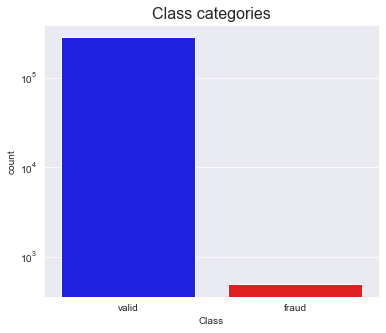

In [7]:
plt.figure(figsize=(6,5))
cp = sns.countplot(ds['Class'], palette=['blue', 'red'])
cp.set_xticklabels(labels = ['valid', 'fraud'])
plt.title('Class categories', fontsize=16)
plt.yscale('log')

plt.show()

**Figure 1.** Target 'Class'  number of instances in each category.

In [6]:
fraud = ds[ds['Class']==1]
valid = ds[ds['Class']==0]

fraud_perc = (len(fraud) / len(ds)) * 100
valid_perc = (len(valid) / len(ds)) * 100

print('Fraud transactions:', len(fraud))
print('Valid transactions:', len(valid))
print('Percentage of fraud transactions: {:.4f}'.format(fraud_perc))
print('Percentage of valid transactions: {:.4f}'.format(valid_perc))

Fraud transactions: 492
Valid transactions: 284315
Percentage of fraud transactions: 0.1727
Percentage of valid transactions: 99.8273


Before starting with a deeper analysis we'll delete duplicated instances, change the scale of feature 'Time' from seconds to hours and reorder the columns for a better visualization:

In [7]:
def ds_info(ds1,ds2):
    print('Deleted rows: {}'.format(ds1.shape[0]-ds2.shape[0]))
    print('Number of rows: {}'.format(ds2.shape[0]))
    print('Number of columns: {}'.format(ds2.shape[1]))    

In [8]:
ds_1 = ds.drop_duplicates()
ds_info(ds, ds_1)

Deleted rows: 1081
Number of rows: 283726
Number of columns: 31


In [9]:
time_column = ds.pop('Time')
ds.insert(28, 'Time', time_column)

### Distributions

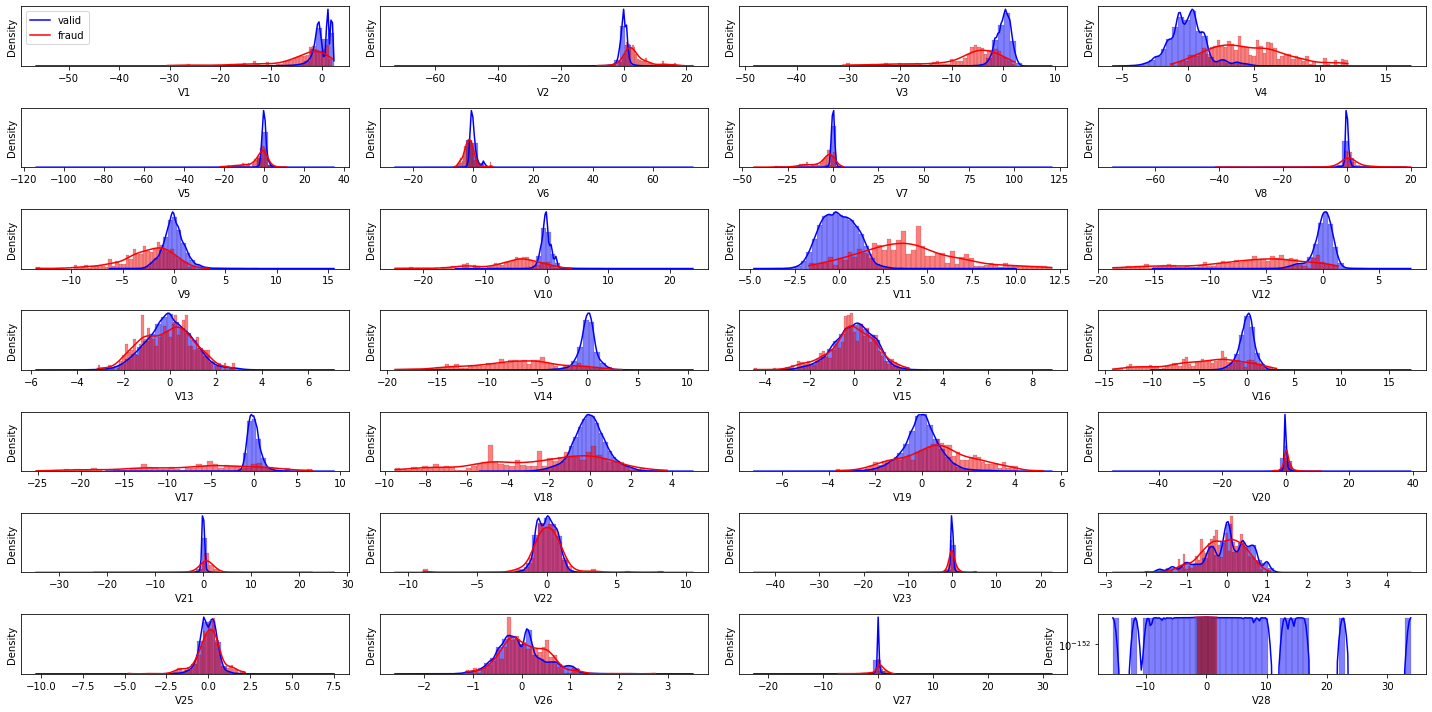

In [80]:
fig, axes = plt.subplots(7, 4, figsize=(20, 10))
ax = axes.ravel()
for i in range(28):
    sns.histplot(valid.iloc[:, i+1], ax=ax[i], bins=50, kde=True, stat="density", linewidth=0.1, color='b')
    sns.histplot(fraud.iloc[:, i+1], ax=ax[i], bins=50, kde=True, stat="density", linewidth=0.1, color='r')
    ax[i].set_yticks(())

ax[0].legend(["valid", "fraud"], loc="best")
fig.tight_layout()

plt.yscale('log')

**Figure 2.** Variables distributions with respect to the target 'Class'.

### Correlations

In [180]:
corr = ds.corr()

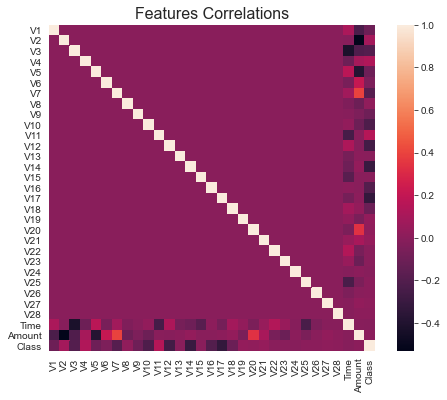

In [13]:
fig = plt.figure(figsize=(8,6))
plt.title('Features Correlations', fontsize=16)
sns.heatmap(corr, square=True) 

plt.show()

**Figure 3a.** Correlation coefficients between the different variables.

Let's zoom in the non-anonymous features:

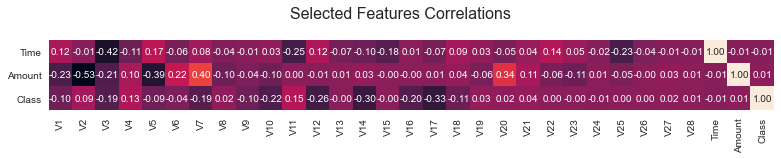

In [75]:
fig = plt.figure(figsize=(13,3))

plt.suptitle('Selected Features Correlations', fontsize=16)
sns.heatmap(corr['Time':], square=True, annot=True, fmt='.2f', cbar=False)  
fig.subplots_adjust(top=1.2) 

plt.show()

**Figure 3b.** Correlation coefficients between anonymous and non-anonymous variables.

There is correlation between the non-anonymous features (Time, Amount and target Class) and same of the anonymous features (V's).

Correlations inspection:

In [181]:
def correlations(ft, ft1, ft2, ft3, ft4):
    
    features = [ft1, ft2, ft3, ft4]
    
    fig, ax = plt.subplots(1,4, figsize=(16, 4), sharey=True)
    fig.suptitle('Features Correlations', fontsize=16)
    ax[0].set_ylabel(ft)
    for i in range(len(features)):
        ax[i].scatter(fraud[features[i]], fraud[ft], alpha=0.5, color='r', edgecolor='black', linewidths=.7,zorder=2, label='fraud')
        ax[i].scatter(valid[features[i]], valid[ft], alpha=0.5, color='b', edgecolor='black', linewidths=.7,zorder=1, label='valid')
        ax[i].set_xlabel(features[i])

    fig.tight_layout()
    plt.show()

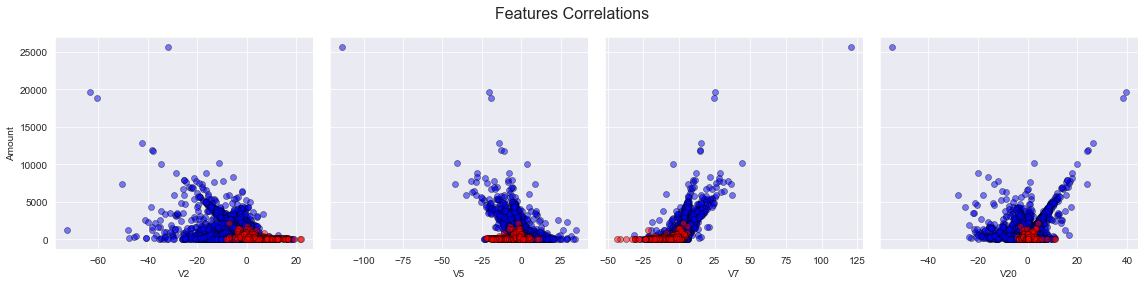

In [85]:
correlations('Amount', 'V2', 'V5', 'V7', 'V20')

**Figure 4a.** Significant correlation between V features with Amount.

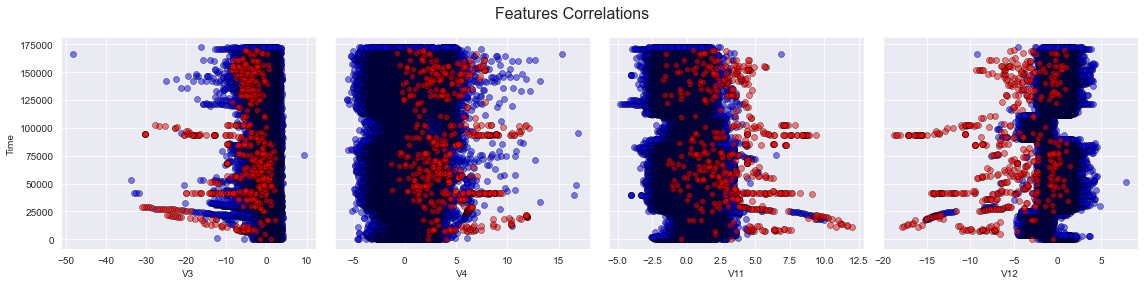

In [17]:
correlations('Time', 'V3', 'V4', 'V11', 'V12')

**Figure 4b.** Significant correlation between V features with Time.

In figure 4b features clearly separate the types of transactions (red and blue points) wrt Time. We can see line-shaped clusters of red points that could indicate someone or an organization trying to commit fraud transactions at the same time.

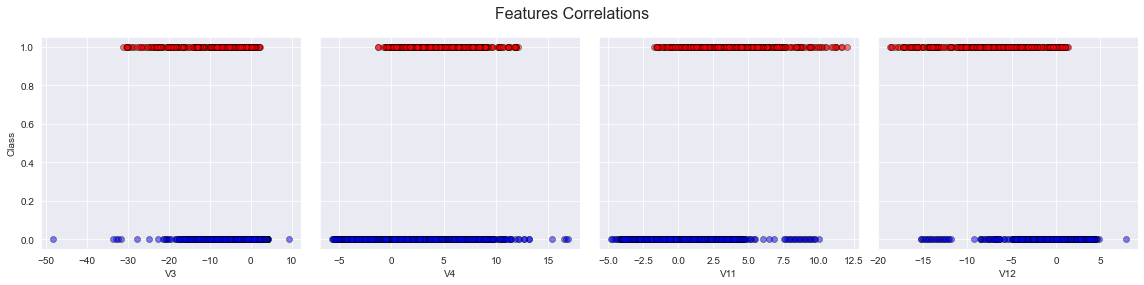

In [26]:
correlations('Class', 'V3', 'V4', 'V11', 'V12')

**Figure 4d.** Correlation between 'those' V's with Class.

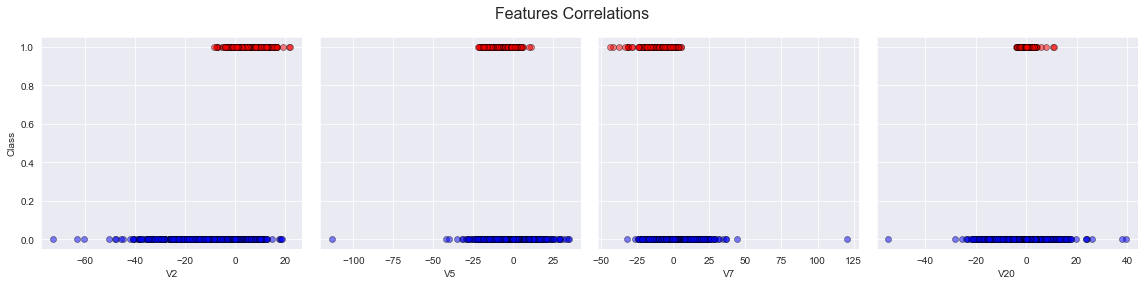

In [29]:
correlations('Class', 'V2', 'V5', 'V7', 'V20')

**Figure 4e.** Correlation between 'those' V's with Class.

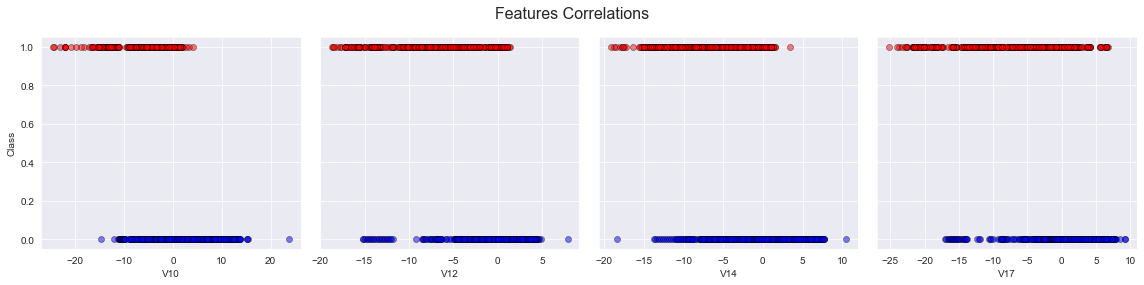

In [183]:
correlations('Class', 'V10', 'V12', 'V14', 'V17')

**Figure 4f.** Significant correlation between V features with Class.

### Feature Amount analysis

In [63]:
pd.concat([fraud['Amount'].describe(), valid['Amount'].describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


The maximun Amount for a Fraud transaction is U$S 2125.

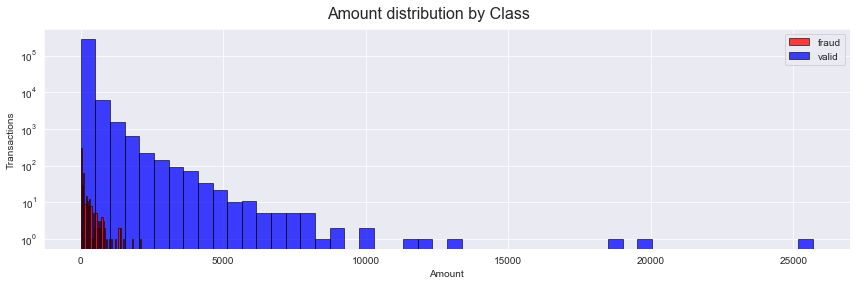

In [12]:
fig, ax = plt.subplots(1,figsize=(12, 4)) 
fig.suptitle('Amount distribution by Class', fontsize=16) 

ax.hist(fraud['Amount'], alpha=0.75, bins=50, label='fraud', color='r',zorder=2, edgecolor='black', linewidth=.8) 
ax.hist(valid['Amount'], alpha=0.75, bins=50, label='valid', color='b',zorder=1, edgecolor='black', linewidth=.8) 
ax.legend(loc='upper right')
ax.set_ylabel('Transactions') 
plt.xlabel('Amount')
plt.yscale('log')
    
fig.tight_layout() 
fig.subplots_adjust(top=0.9) 

plt.show() 

**Figure 5.** Feature 'Amount' fraud and valid cases distributions (histograms).

As we know, Fraud transactions are far less than Valid transactions and of small amounts. There are many of high value Valid transactions so we will filter on this feature.

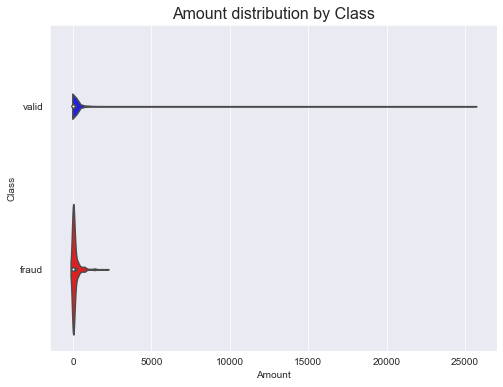

In [179]:
plt.figure(figsize=(8,6))

vp=sns.violinplot(x="Amount", y="Class", data=ds, palette=['blue', 'red'], orient='h')
vp.set_yticklabels(labels = ['valid', 'fraud'])
plt.title('Amount distribution by Class', fontsize=16)

plt.show()

**Figure 6.** Feature 'Amount' fraud and valid cases distributions (violin plots).

### Feature Time analysis 

In [12]:
pd.concat([fraud['Time'].describe(), valid['Time'].describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


Different distribution but more difficult to interpret because it's a "series-data".

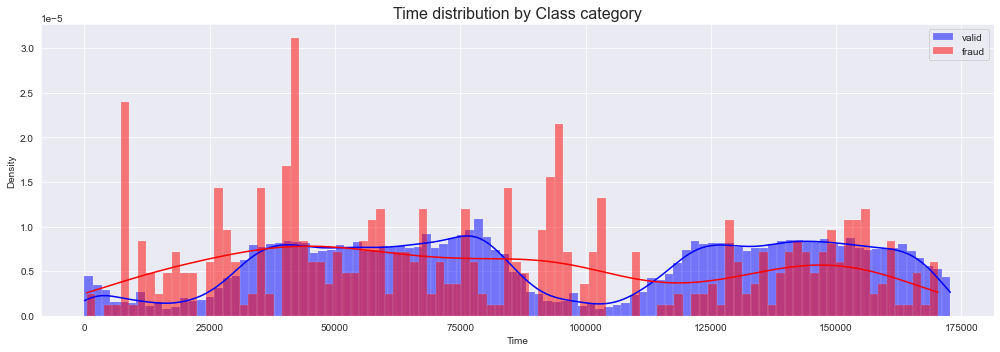

In [14]:
fig, ax = plt.subplots(1,figsize=(14, 5)) 

sns.histplot(valid['Time'], bins=100, kde=True, stat="density", linewidth=0.1, color='b', label='valid')
sns.histplot(fraud['Time'], bins=100, kde=True, stat="density", linewidth=0.1, color='r', label='fraud')
plt.title('Time distribution by Class category', fontsize=16)
ax.legend(loc='upper right')
fig.tight_layout()

**Figure 7.** Feature 'Time' fraud and valid cases distributions distributions (histograms). 

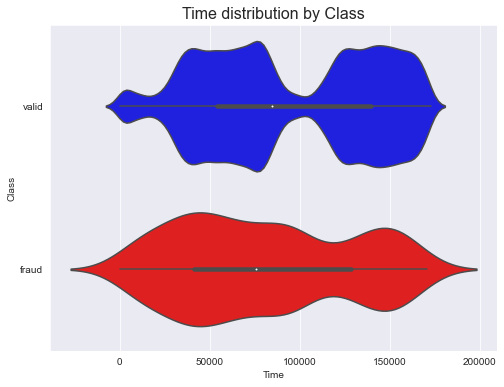

In [21]:
plt.figure(figsize=(8,6))

vp=sns.violinplot(x="Time", y="Class", data=ds, palette=['blue', 'red'], orient='h')
vp.set_yticklabels(labels = ['valid', 'fraud'])
plt.title('Time distribution by Class', fontsize=16)

plt.show()

**Figure 8.** Feature 'Time' fraud and valid cases distributions distributions (violin plots). 

## 2. Data Preparation
---

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
smote = SMOTE(random_state=42)

In [12]:
ds_ = ds.copy()

In [13]:
r_scaler = RobustScaler()

ds_['scaled_amount'] = r_scaler.fit_transform(ds_['Amount'].values.reshape(-1,1))
ds_['scaled_time'] = r_scaler.fit_transform(ds_['Time'].values.reshape(-1,1))

ds_.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
ds_.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [15]:
X = ds_.drop(columns='Class')
y = ds_['Class']

In [16]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (284807, 30)
y shape: (284807,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [18]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape)) 
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (213605, 30)
y_train shape: (213605,)
X_test shape: (71202, 30)
y_test shape: (71202,)


In [19]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [20]:
y_train.value_counts()

0    213226
1    213226
Name: Class, dtype: int64

In [21]:
y_test.value_counts()

0    71089
1      113
Name: Class, dtype: int64

## 3. Models Training, evaluation and error analysis
---

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance

In [25]:
def scr(model, X_train, y_train, X_test, y_test):        
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')    

In [26]:
def plot_cm(y_pred_):           
    cnf_matrix = confusion_matrix(y_test, y_pred_)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()    

In [27]:
def class_report(y_pred_):                                                                      
    print(classification_report(y_test, y_pred_, target_names = ['valid','fraud']))

In [31]:
def plot_pr(model):     
    y_pred_prob = model.predict_proba(X_test)[:,1]   
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

In [32]:
def plot_roc(model):                        
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
    roc_auccat = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auccat)
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC\n',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)

In [33]:
def plot_pr_roc(y_pred_, model):
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    y_pred_prob = model.predict_proba(X_test)[:,1]   
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    ax[0].plot(precision, recall)
    ax[0].set_xlabel('Recall',fontsize=13)
    ax[0].set_ylabel('Precision',fontsize=13)
    ax[0].set_title('Precision Recall',fontsize=13)
    
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
    roc_auccat = auc(fpr, tpr)
    
    ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auccat)
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].set_title('ROC',fontsize=15)
    ax[1].set_ylabel('True Positive Rate',fontsize=13)
    ax[1].set_xlabel('False Positive Rate',fontsize=13)
    ax[1].legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)

    plt.show()

In [34]:
def plot_pr_roc_(y_pred_, model):      
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    y_pred_prob = model.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    ax[0].plot(precision, recall)
    ax[0].set_xlabel('Recall',fontsize=13)
    ax[0].set_ylabel('Precision',fontsize=13)
    ax[0].set_title('Precision Recall',fontsize=13)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
    roc_auccat = auc(fpr, tpr)
    
    ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auccat)
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].set_title('ROC',fontsize=15)
    ax[1].set_ylabel('True Positive Rate',fontsize=13)
    ax[1].set_xlabel('False Positive Rate',fontsize=13)
    ax[1].legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)

    plt.show()

In [35]:
def plot_fi(model, nombre):
    
    importances = model.feature_importances_
    columns = X.columns
    
    plt.figure(figsize=(12,5))
    
    sns.barplot(columns, importances)
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.xlabel('Features', fontsize=13)
    plt.ylabel('Importance', fontsize=13)
    plt.title(f'Feature Importance\n Model: {nombre}', fontsize=18)
    
    plt.show()

In [36]:
def grid_results(grid):
    
    print('Best Hiperparameters:', grid.best_params_)
    print('CV mean results:', grid.best_score_)

### Model 1: Logistic Regression
---

In [37]:
lr_grid = {'C': [1e-06, 2e-06, 4e-06, 5e-06]}      

In [38]:
lr = LogisticRegression(random_state=42)

In [39]:
lr_gs = GridSearchCV(lr, lr_grid, scoring='f1', cv=5, n_jobs=-1)

In [40]:
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [1e-06, 2e-06, 4e-06, 5e-06]}, scoring='f1')

In [41]:
grid_results(lr_gs)

Best Hiperparameters: {'C': 5e-06}
CV mean results: 0.9200360794328942


• Model 1a -> 1e-06

In [43]:
lr_t = LogisticRegression(C=5e-06, random_state=42)

In [44]:
lr_t.fit(X_train, y_train)

LogisticRegression(C=5e-06, random_state=42)

In [45]:
y_pred_lr_t= lr_t.predict(X_test)

In [46]:
class_report(y_pred_lr_t)      

              precision    recall  f1-score   support

       valid       1.00      0.99      1.00     71089
       fraud       0.21      0.88      0.34       113

    accuracy                           0.99     71202
   macro avg       0.61      0.94      0.67     71202
weighted avg       1.00      0.99      1.00     71202



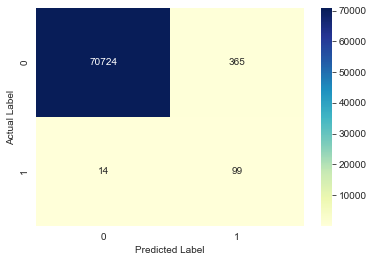

In [49]:
plot_cm(y_pred_lr_t)   

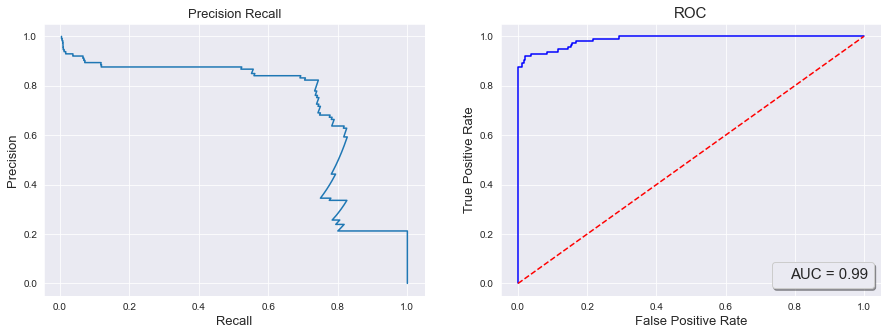

In [50]:
plot_pr_roc(y_pred_lr_t, lr_t)

### Model 2: SVM
---

In [63]:
svc = LinearSVC()

In [64]:
svc_grid = {'C': [1e-04 , 5e-04 , 1e-05, 5e-05]}  

In [65]:
svc_gs = GridSearchCV(svc, svc_grid, scoring='f1', cv=5, n_jobs=-1)

In [66]:
svc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.0005, 1e-05, 5e-05]}, scoring='f1')

In [68]:
grid_results(svc_gs)

Best Hiperparameters: {'C': 0.0005}
CV mean results: 0.9414795466020311


In [70]:
svc_t = LinearSVC(C=0.0005, random_state=42)

In [71]:
svc_t.fit(X_train, y_train)

LinearSVC(C=0.0005, random_state=42)

In [72]:
y_pred_svc_t= svc_t.predict(X_test)

In [73]:
class_report(y_pred_svc_t) 

              precision    recall  f1-score   support

       valid       1.00      0.98      0.99     71089
       fraud       0.07      0.92      0.13       113

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.56     71202
weighted avg       1.00      0.98      0.99     71202



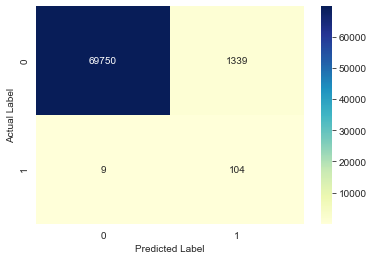

In [74]:
plot_cm(y_pred_svc_t) 

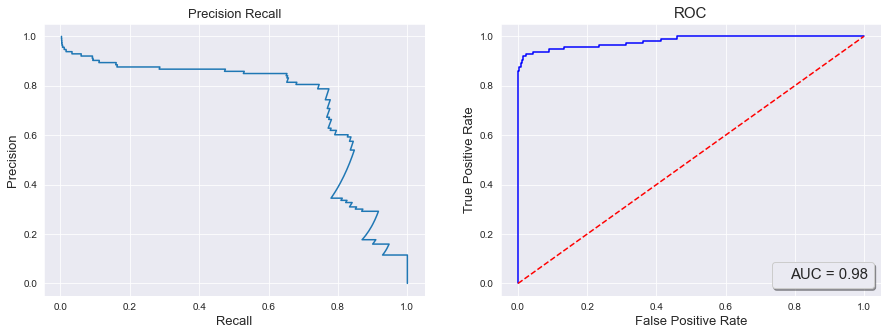

In [75]:
plot_pr_roc_(y_pred_svc_t, svc_t)

### Model 3: Random Forest 
---

In [43]:
forest = RandomForestClassifier(random_state=42, n_jobs=-1)         

In [51]:
forest_grid = {'n_estimators': [100, 200, 300],   
                'max_features': [3, 6, 9], 
                'max_depth': [5, 10, 20, None]}

In [52]:
forest_gs = GridSearchCV(forest, forest_grid, scoring='f1', cv=5, n_jobs=-1)

In [ ]:
forest_gs.fit(X_train, y_train)

In [ ]:
grid_results(forest_gs)

In [84]:
forest_t =RandomForestClassifier(n_estimators=200 , max_features='sqrt' , max_depth=25 , random_state=42, n_jobs=-1)

In [85]:
forest_t.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=200,
                       n_jobs=-1, random_state=42)

In [86]:
y_pred_forest_t= forest_t.predict(X_test)

In [87]:
class_report(y_pred_forest_t) 

              precision    recall  f1-score   support

       valid       1.00      1.00      1.00     71089
       fraud       0.81      0.87      0.84       113

    accuracy                           1.00     71202
   macro avg       0.90      0.93      0.92     71202
weighted avg       1.00      1.00      1.00     71202



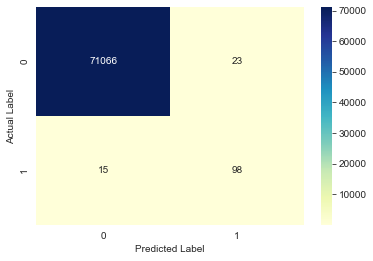

In [88]:
plot_cm(y_pred_forest_t)  

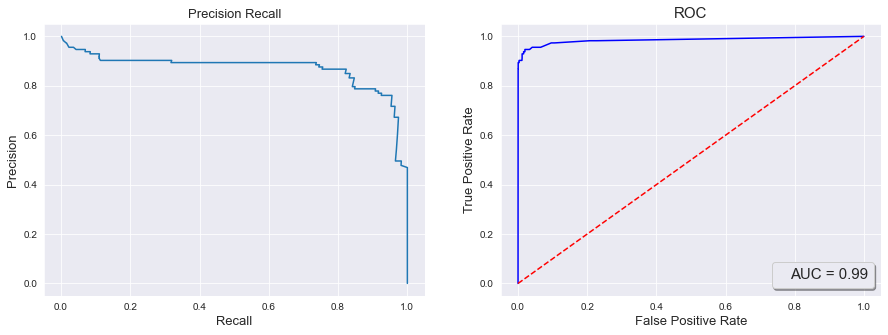

In [89]:
plot_pr_roc(y_pred_forest_t, forest_t)

### Model 4: XGBoost
---

In [174]:
xgb_t = xgb.XGBClassifier()                              

In [175]:
xgb_grid = {                                    
        'max_depth': [2,3,4,10, 20, None],
        'learning_rate': [0.1, 0.2],
        'gamma': [0, 0.1],
        'reg_lambda': [0.1, 1.0, 10.0]
        }

In [176]:
xgb_gs = GridSearchCV(xgb_t, xgb_grid, scoring='f1', cv=5, n_jobs=-1) 

In [177]:
xgb_gs.fit(X_train, y_train)                                        

[17:48:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [178]:
grid_results(xgb_gs)

Best Hiperparameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4}
CV mean results: 0.998114888901606


In [181]:
xgb_t = xgb.XGBClassifier(gamma=0.1, 
                          learning_rate=0.2, 
                          max_depth=4, 
                          reg_lambda=1,
                          random_state=42)

In [182]:
xgb_t.fit(X_train, y_train)

[17:52:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [183]:
y_pred_xgb_t= xgb_t.predict(X_test)

In [184]:
class_report(y_pred_xgb_t)

              precision    recall  f1-score   support

       valid       1.00      1.00      1.00     71089
       fraud       0.31      0.89      0.46       113

    accuracy                           1.00     71202
   macro avg       0.66      0.95      0.73     71202
weighted avg       1.00      1.00      1.00     71202



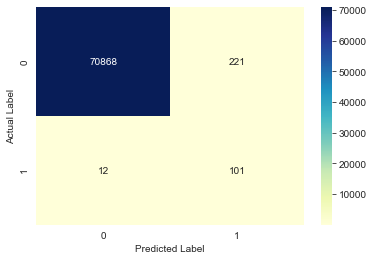

In [185]:
plot_cm(y_pred_xgb_t)

## 4. Model selection

Taking recall as our main metric given the nature of the problem, SVM and XGBoost obtained the best results. And although the SVM models got 104 True Positive cases (3 more than the XGBoost), it generated almost 1300 False positives (XGBoost only 221). For this reason we will choose the XGBoost model to continue working and improving.